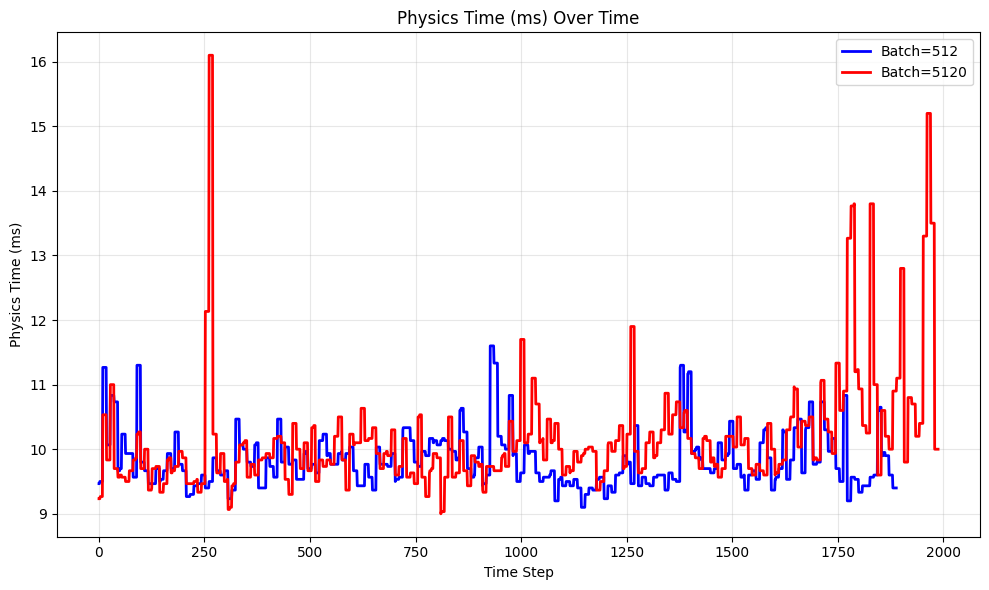

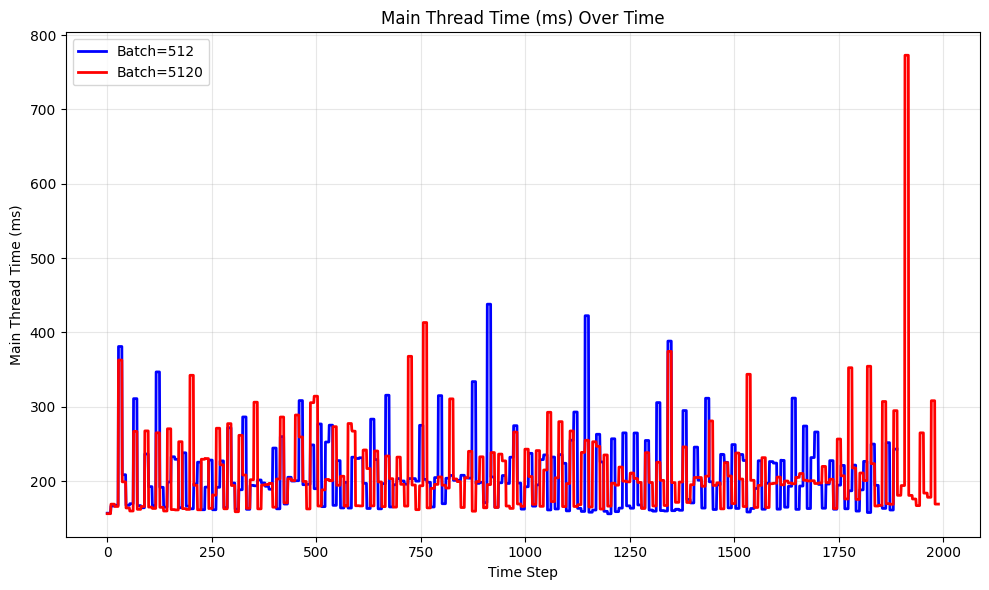

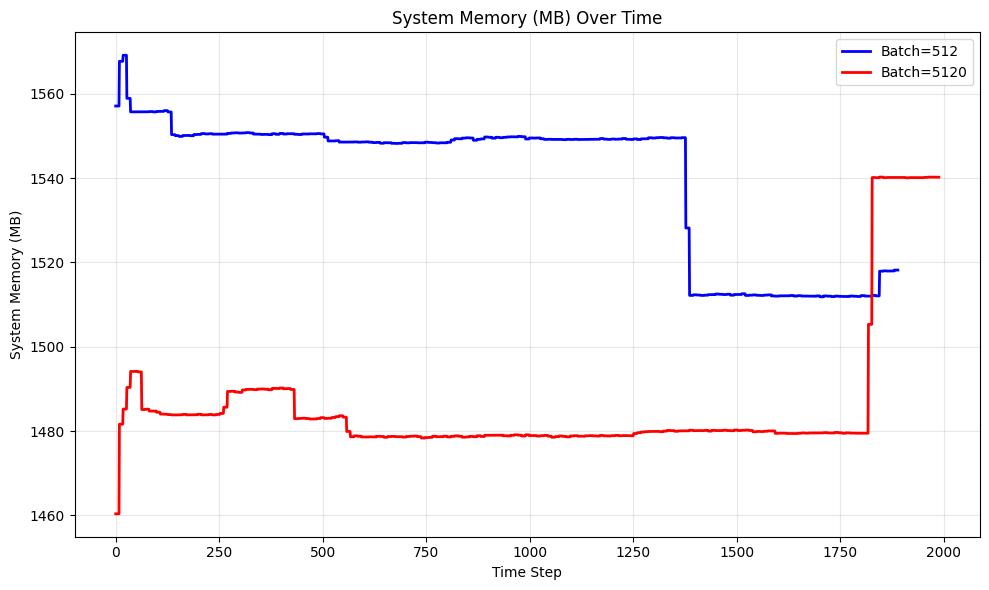

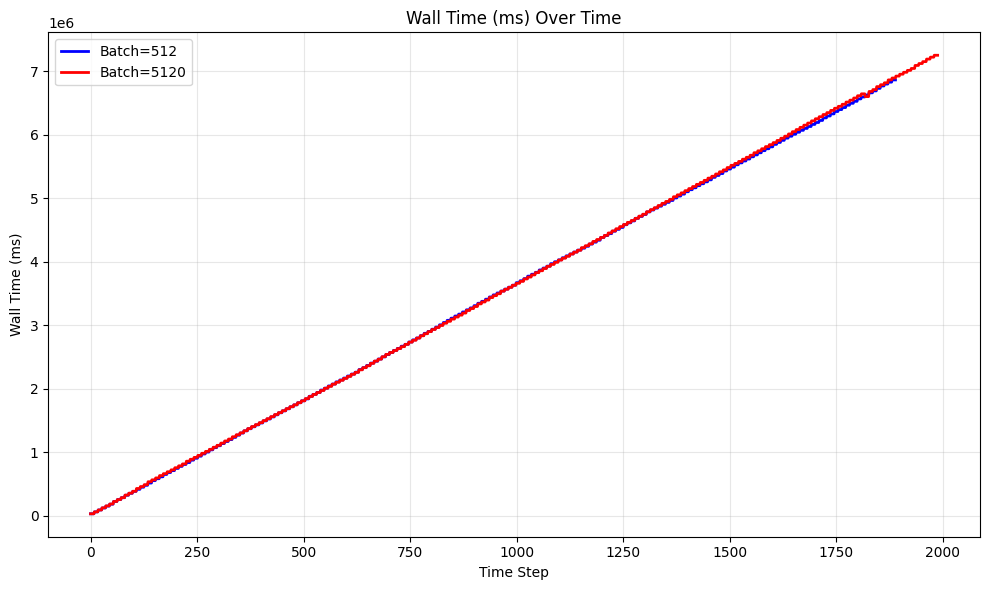

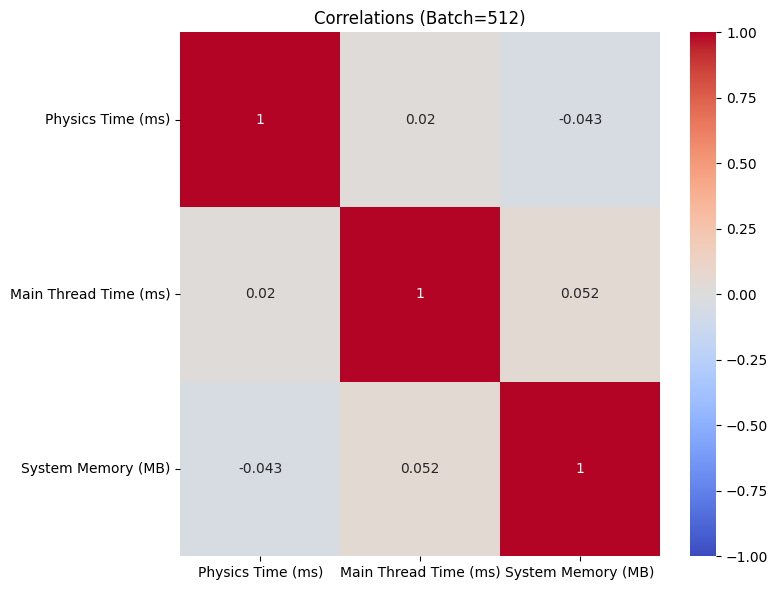

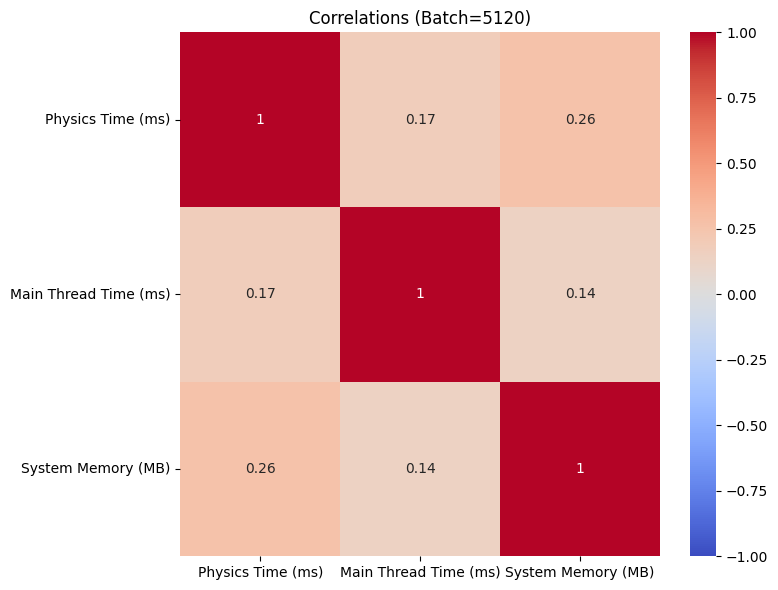

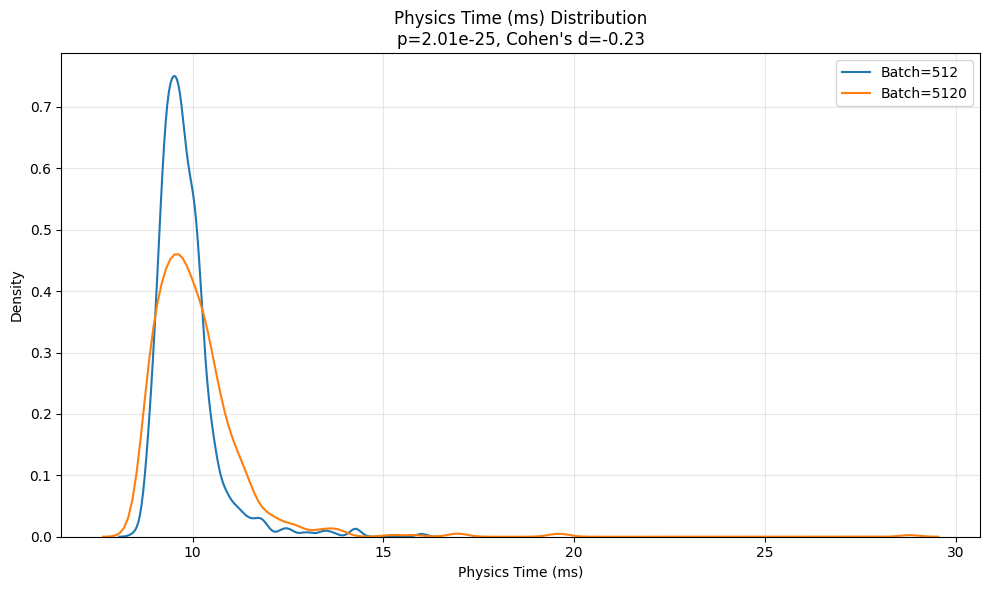

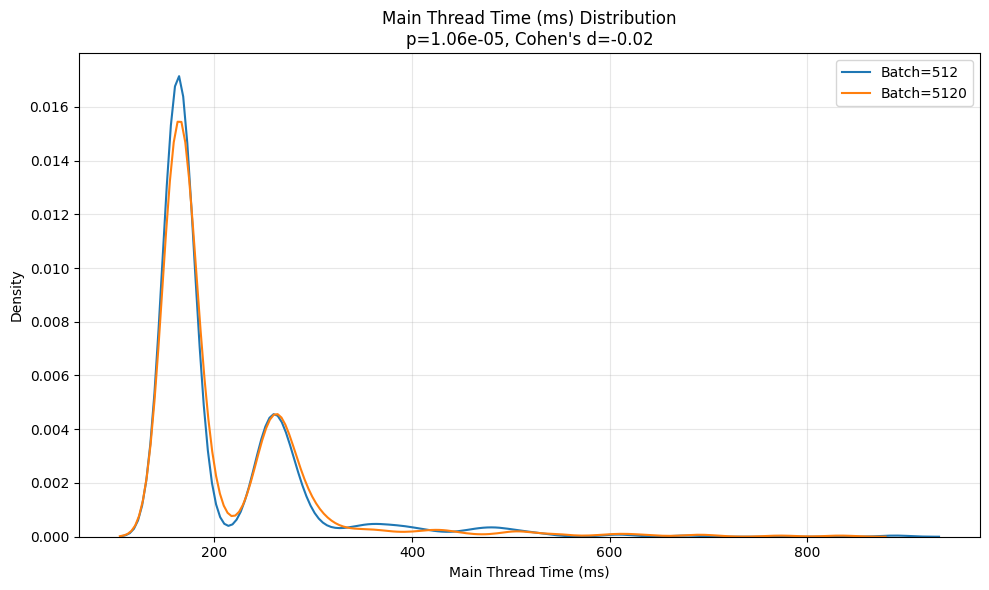

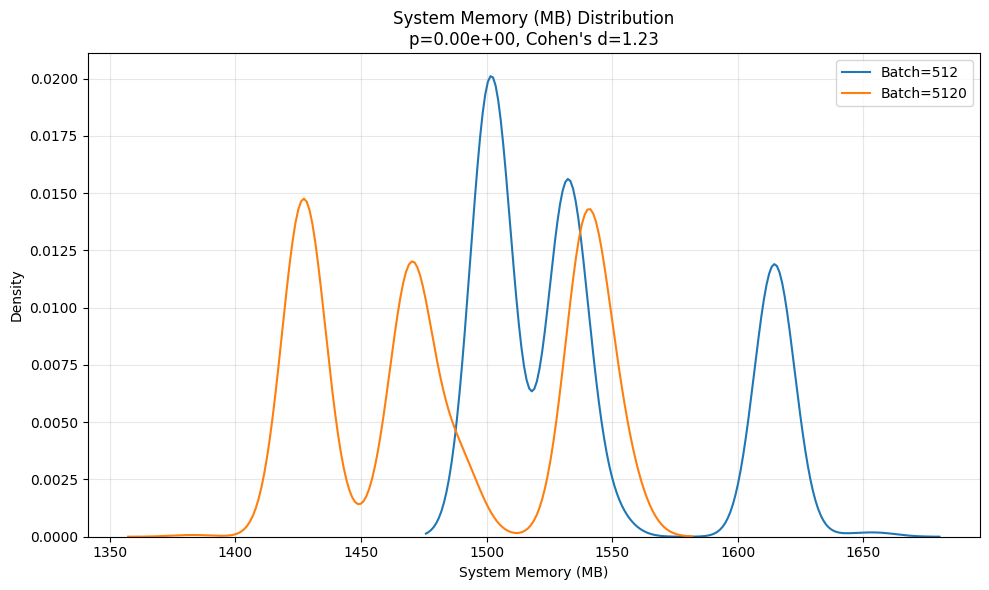

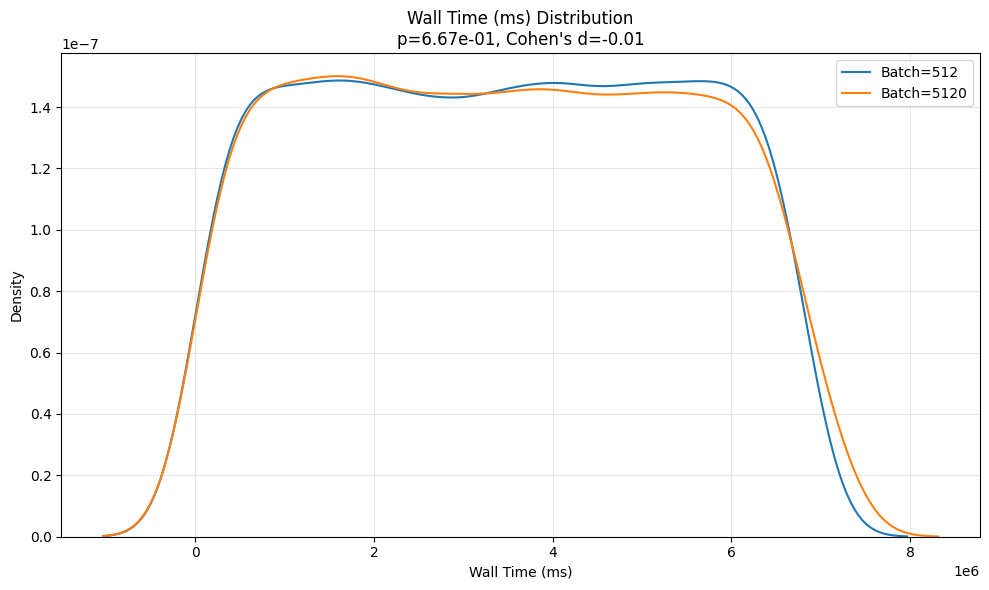

/opt/homebrew/anaconda3/envs/mlagents/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5625.
  res = hypotest_fun_out(*samples, **kwds)
/opt/homebrew/anaconda3/envs/mlagents/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5634.
  res = hypotest_fun_out(*samples, **kwds)


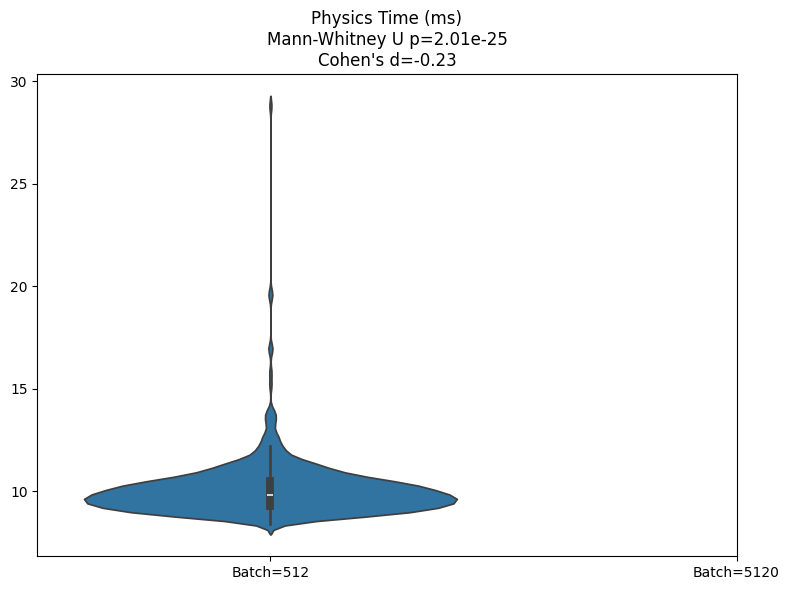

/opt/homebrew/anaconda3/envs/mlagents/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5625.
  res = hypotest_fun_out(*samples, **kwds)
/opt/homebrew/anaconda3/envs/mlagents/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5634.
  res = hypotest_fun_out(*samples, **kwds)


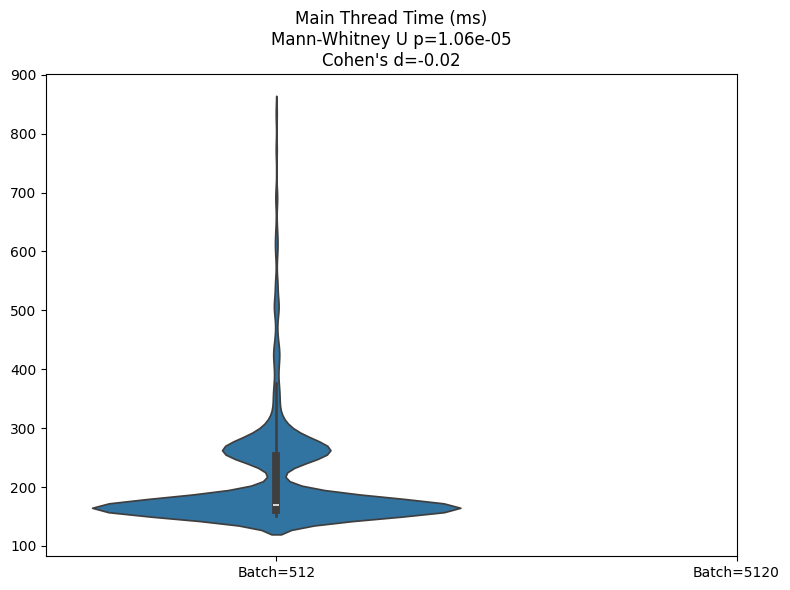

/opt/homebrew/anaconda3/envs/mlagents/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5625.
  res = hypotest_fun_out(*samples, **kwds)
/opt/homebrew/anaconda3/envs/mlagents/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5634.
  res = hypotest_fun_out(*samples, **kwds)


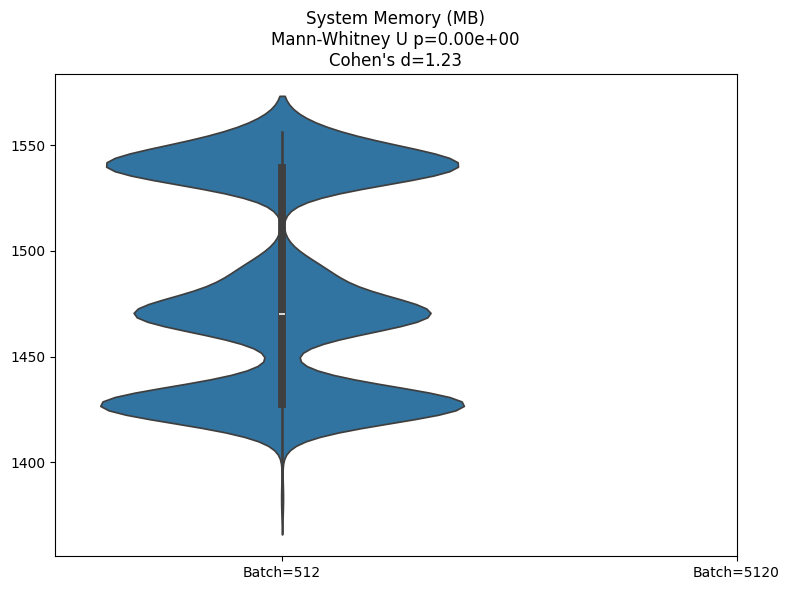

/opt/homebrew/anaconda3/envs/mlagents/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5625.
  res = hypotest_fun_out(*samples, **kwds)
/opt/homebrew/anaconda3/envs/mlagents/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5634.
  res = hypotest_fun_out(*samples, **kwds)
/var/folders/nh/szgrk_lj0p7c5cp5vmsqjf180000gn/T/ipykernel_51504/1169090121.py:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{x/1000:.0f}' for x in ax.get_yticks()])


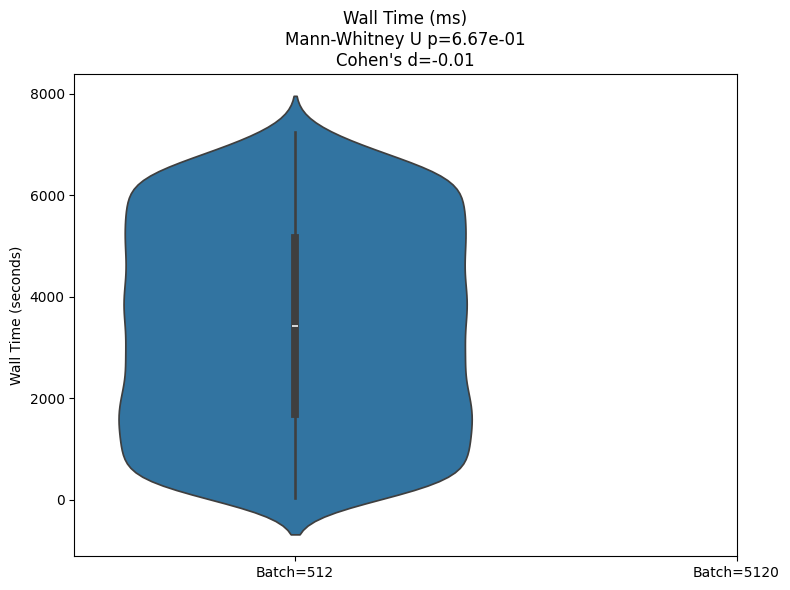

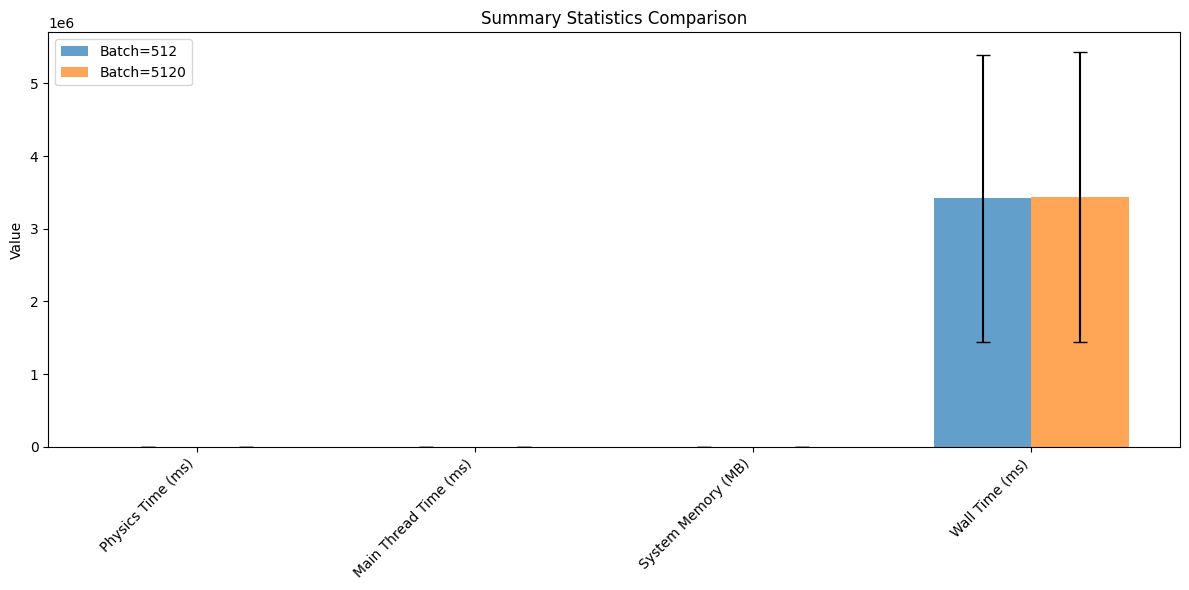


=== Statistical Analysis Results ===

--------------------------------------------------

Physics Time (ms):

Batch=512:
Mean: 9.826
Std:  0.788
Min:  8.500
Max:  16.000
Median: 9.700

Batch=5120:
Mean: 10.093
Std:  1.397
Min:  8.400
Max:  28.800
Median: 9.800

Normality Test (Shapiro-Wilk):
Batch=512 p-value: 3.92e-66
Batch=5120 p-value: 5.28e-76

Mann-Whitney U p-value: 2.01e-25
Effect size (Cohen's d): -0.235

--------------------------------------------------

Main Thread Time (ms):

Batch=512:
Mean: 207.965
Std:  83.496
Min:  150.643
Max:  888.983
Median: 166.930

Batch=5120:
Mean: 209.975
Std:  86.274
Min:  150.368
Max:  833.389
Median: 169.484

Normality Test (Shapiro-Wilk):
Batch=512 p-value: 4.43e-76
Batch=5120 p-value: 8.09e-77

Mann-Whitney U p-value: 1.06e-05
Effect size (Cohen's d): -0.024

--------------------------------------------------

System Memory (MB):

Batch=512:
Mean: 1540.320
Std:  45.009
Min:  1499.901
Max:  1656.212
Median: 1531.000

Batch=5120:
Mean: 1483.0

In [9]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro, mannwhitneyu, ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

def create_time_series_plot(batch_groups, metric):
    fig, ax = plt.subplots(figsize=(10, 6))
    colors = {'512': 'blue', '5120': 'red'}
    
    for batch_size, dfs in batch_groups.items():
        all_data = pd.concat(dfs)
        mean_data = all_data.groupby(all_data.index)[metric].mean()
        
        ax.plot(mean_data.index, mean_data.values,
               color=colors[batch_size],
               linewidth=2,
               label=f'Batch={batch_size}')
    
    ax.set_title(f'{metric} Over Time')
    ax.set_xlabel('Time Step')
    ax.set_ylabel(metric)
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    return fig

def create_correlation_heatmap(data, batch_size, metrics):
    fig, ax = plt.subplots(figsize=(8, 6))
    corr = data[metrics].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=ax)
    ax.set_title(f'Correlations (Batch={batch_size})')
    plt.tight_layout()
    return fig

def create_distribution_plot(data_512, data_5120, metric):
    fig, ax = plt.subplots(figsize=(10, 6))
    
    sns.kdeplot(data=data_512[metric], ax=ax, label='Batch=512')
    sns.kdeplot(data=data_5120[metric], ax=ax, label='Batch=5120')
    
    _, p_val = mannwhitneyu(data_512[metric], data_5120[metric], alternative='two-sided')
    d = (np.mean(data_512[metric]) - np.mean(data_5120[metric])) / np.sqrt(
        (np.std(data_512[metric])**2 + np.std(data_5120[metric])**2) / 2)
    
    ax.set_title(f'{metric} Distribution\np={p_val:.2e}, Cohen\'s d={d:.2f}')
    ax.legend()
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    return fig

def create_violin_plot(data_512, data_5120, metric, results):
    fig, ax = plt.subplots(figsize=(8, 6))
    
    sns.violinplot(data=[data_512[metric], data_5120[metric]], ax=ax, inner='box')
    
    stat_name = results[metric]['statistical_test']
    p_value = results[metric]['test_p_value']
    d = results[metric]['effect_size']
    
    ax.set_title(f'{metric}\n{stat_name} p={p_value:.2e}\nCohen\'s d={d:.2f}')
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['Batch=512', 'Batch=5120'])
    
    if metric == 'Wall Time (ms)':
        ax.set_ylabel('Wall Time (seconds)')
        ax.set_yticklabels([f'{x/1000:.0f}' for x in ax.get_yticks()])
    
    plt.tight_layout()
    return fig

def create_summary_stats_plot(results, metrics):
    fig, ax = plt.subplots(figsize=(12, 6))
    x = np.arange(len(metrics))
    width = 0.35
    
    means_512 = [results[m]['batch_512_stats']['mean'] for m in metrics]
    means_5120 = [results[m]['batch_5120_stats']['mean'] for m in metrics]
    stds_512 = [results[m]['batch_512_stats']['std'] for m in metrics]
    stds_5120 = [results[m]['batch_5120_stats']['std'] for m in metrics]
    
    ax.bar(x - width/2, means_512, width, yerr=stds_512, label='Batch=512', capsize=5, alpha=0.7)
    ax.bar(x + width/2, means_5120, width, yerr=stds_5120, label='Batch=5120', capsize=5, alpha=0.7)
    
    ax.set_ylabel('Value')
    ax.set_title('Summary Statistics Comparison')
    ax.set_xticks(x)
    ax.set_xticklabels(metrics, rotation=45, ha='right')
    ax.legend()
    plt.tight_layout()
    return fig

def load_and_analyze_data(files):
    batch_groups = {'512': [], '5120': []}
    
    for file, batch_size in files:
        df = pd.read_csv(file)
        batch_groups[batch_size].append(df)
    
    data_512 = pd.concat(batch_groups['512'], ignore_index=True)
    data_5120 = pd.concat(batch_groups['5120'], ignore_index=True)
    
    metrics = ['Physics Time (ms)', 'Main Thread Time (ms)', 
              'System Memory (MB)', 'Wall Time (ms)']
    correlation_metrics = ['Physics Time (ms)', 'Main Thread Time (ms)', 'System Memory (MB)']

    for metric in metrics:
        time_series_fig = create_time_series_plot(batch_groups, metric)
        plt.show()

    corr_fig_512 = create_correlation_heatmap(data_512, '512', correlation_metrics)
    plt.show()
    corr_fig_5120 = create_correlation_heatmap(data_5120, '5120', correlation_metrics)
    plt.show()

    for metric in metrics:
        dist_fig = create_distribution_plot(data_512, data_5120, metric)
        plt.show()

    results = {}
    for metric in metrics:
        _, p_val_512 = shapiro(data_512[metric])
        _, p_val_5120 = shapiro(data_5120[metric])
        
        if p_val_512 > 0.05 and p_val_5120 > 0.05:
            stat_name = "T-test"
            statistic, p_value = ttest_ind(data_512[metric], data_5120[metric])
        else:
            stat_name = "Mann-Whitney U"
            statistic, p_value = mannwhitneyu(data_512[metric], data_5120[metric], alternative='two-sided')
        
        d = (np.mean(data_512[metric]) - np.mean(data_5120[metric])) / np.sqrt(
            (np.std(data_512[metric])**2 + np.std(data_5120[metric])**2) / 2)
        
        results[metric] = {
            'normality_test': 'Shapiro-Wilk',
            'normality_p_512': p_val_512,
            'normality_p_5120': p_val_5120,
            'statistical_test': stat_name,
            'test_p_value': p_value,
            'effect_size': d,
            'batch_512_stats': data_512[metric].describe(),
            'batch_5120_stats': data_5120[metric].describe()
        }

        violin_fig = create_violin_plot(data_512, data_5120, metric, results)
        plt.show()

    summary_fig = create_summary_stats_plot(results, metrics)
    plt.show()

    print("\n=== Statistical Analysis Results ===")
    for metric, stats in results.items():
        print(f"\n{'-'*50}")
        print(f"\n{metric}:")
        
        print(f"\nBatch=512:")
        print(f"Mean: {stats['batch_512_stats']['mean']:.3f}")
        print(f"Std:  {stats['batch_512_stats']['std']:.3f}")
        print(f"Min:  {stats['batch_512_stats']['min']:.3f}")
        print(f"Max:  {stats['batch_512_stats']['max']:.3f}")
        print(f"Median: {stats['batch_512_stats']['50%']:.3f}")
        
        print(f"\nBatch=5120:")
        print(f"Mean: {stats['batch_5120_stats']['mean']:.3f}")
        print(f"Std:  {stats['batch_5120_stats']['std']:.3f}")
        print(f"Min:  {stats['batch_5120_stats']['min']:.3f}")
        print(f"Max:  {stats['batch_5120_stats']['max']:.3f}")
        print(f"Median: {stats['batch_5120_stats']['50%']:.3f}")
        
        print(f"\nNormality Test ({stats['normality_test']}):")
        print(f"Batch=512 p-value: {stats['normality_p_512']:.2e}")
        print(f"Batch=5120 p-value: {stats['normality_p_5120']:.2e}")
        print(f"\n{stats['statistical_test']} p-value: {stats['test_p_value']:.2e}")
        print(f"Effect size (Cohen's d): {stats['effect_size']:.3f}")

files = [
    ('Batch-size_512-1.csv', '512'),
    ('Batch-size_512-2.csv', '512'),
    ('Batch-size_512-3.csv', '512'),
    ('Batch-size_5120-1.csv', '5120'),
    ('Batch-size_5120-2.csv', '5120'),
    ('Batch-size_5120-3.csv', '5120')
]

load_and_analyze_data(files)